In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Load datasets
headers_character_metadata = ['Wikipedia Movie ID', 'Freebase Movie ID','Movie release date', 'Character name', 'Actor DOB', 
                              'Actor gender', 'Actor height', 'Actor ethnicity', 'Actor name',
                              'Actor age a movie release', 'Freebase character map', 'what1', 'what2']
character_metadata = pd.read_csv('../data/character.metadata.tsv', sep='\t', names=headers_character_metadata)

headers_movie_metadata = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie name", "Movie release date",
                          "Movie box office revenue", "Movie runtime", "Movie languages", "Movie countries",
                          "Movie genres"]
movie_metadata = pd.read_csv('../data/movie.metadata.tsv', sep='\t', names=headers_movie_metadata)

# Display datasets for inspection
character_metadata.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age a movie release,Freebase character map,what1,what2
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [24]:
# Add a column of release year to get consistensy
character_metadata['Movie release year'] = character_metadata['Movie release date'].str.split('-').str[0].astype('Int64')
movie_metadata['Movie release year'] = movie_metadata['Movie release date'].str.split('-').str[0].astype('Int64')

In [25]:
# See years
years = character_metadata['Movie release year'].unique()
np.sort(years.fillna(0))

array([0, 1010, 1888, 1891, 1893, 1894, 1895, 1896, 1897, 1898, 1899,
       1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=object)

In [34]:
# Replace 1010 with 2020
character_metadata[character_metadata['Movie release year'] == 1010] = 2010
movie_metadata[movie_metadata['Movie release year'] == 1010] = 2010

In [27]:
# Percentage of missing datapoints for each column in both data set
print('Percentage of NaNs for character dataset')
print(character_metadata.isna().mean() * 100)
print('\n')
print('Percentage of NaNs for movie dataset')
print(movie_metadata.isna().mean() * 100)

Percentage of NaNs for character dataset
Wikipedia Movie ID            0.000000
Freebase Movie ID             0.000000
Movie release date            2.217814
Character name               57.220488
Actor DOB                    23.550988
Actor gender                 10.120288
Actor height                 65.642412
Actor ethnicity              76.463214
Actor name                    0.272484
Actor age a movie release    35.080736
Freebase character map        0.000000
what1                        57.218269
what2                         0.180842
Movie release year            2.217814
dtype: float64


Percentage of NaNs for movie dataset
Wikipedia Movie ID           0.000000
Freebase Movie ID            0.000000
Movie name                   0.000000
Movie release date           8.443743
Movie box office revenue    89.722416
Movie runtime               25.018045
Movie languages              0.000000
Movie countries              0.000000
Movie genres                 0.000000
Movie release yea

In [28]:
# Divide into female and male dataset
female_characters = character_metadata[character_metadata['Actor gender'] == 'F'].copy()
male_characters = character_metadata[character_metadata['Actor gender'] == 'M'].copy()

print('Percentage of NaNs for female dataset')
print(female_characters.isna().mean() * 100)
print('\n')
print('Percentage of NaNs for male dataset')
print(male_characters.isna().mean() * 100)

Percentage of NaNs for female dataset
Wikipedia Movie ID            0.000000
Freebase Movie ID             0.000000
Movie release date            2.589801
Character name               51.193638
Actor DOB                    15.917150
Actor gender                  0.000000
Actor height                 58.074304
Actor ethnicity              74.165047
Actor name                    0.002226
Actor age a movie release    26.374279
Freebase character map        0.000000
what1                        51.193638
what2                         0.000000
Movie release year            2.589801
dtype: float64


Percentage of NaNs for male dataset
Wikipedia Movie ID            0.000000
Freebase Movie ID             0.000000
Movie release date            2.351552
Character name               55.723468
Actor DOB                    15.234582
Actor gender                  0.000000
Actor height                 63.682113
Actor ethnicity              73.658912
Actor name                    0.003330
Actor age a 

In [29]:
# Define a threshold (e.g., 70%) for removing columns
threshold = 70

# Filter columns where NaN percentage is less than or equal to the threshold
filtered_female_columns = female_characters.columns[female_characters.isna().mean() * 100 <= threshold]
filtered_male_colums = male_characters.columns[male_characters.isna().mean() * 100 <= threshold]

# Create a new DataFrame with only the filtered columns
filtered_female_character = female_characters[filtered_female_columns].copy()
filtered_male_character = male_characters[filtered_male_colums].copy()

print('Percentage of NaNs for filtered female dataset')
print(filtered_female_character.isna().mean() * 100)
print('\n')
print('Percentage of NaNs for filtered male dataset')
print(filtered_male_character.isna().mean() * 100)

Percentage of NaNs for filtered female dataset
Wikipedia Movie ID            0.000000
Freebase Movie ID             0.000000
Movie release date            2.589801
Character name               51.193638
Actor DOB                    15.917150
Actor gender                  0.000000
Actor height                 58.074304
Actor name                    0.002226
Actor age a movie release    26.374279
Freebase character map        0.000000
what1                        51.193638
what2                         0.000000
Movie release year            2.589801
dtype: float64


Percentage of NaNs for filtered male dataset
Wikipedia Movie ID            0.000000
Freebase Movie ID             0.000000
Movie release date            2.351552
Character name               55.723468
Actor DOB                    15.234582
Actor gender                  0.000000
Actor height                 63.682113
Actor name                    0.003330
Actor age a movie release    29.130018
Freebase character map        0.0

In [30]:
female_count = female_characters.groupby('Wikipedia Movie ID').size()
male_count = male_characters.groupby('Wikipedia Movie ID').size()

# Ensure that all Wikipedia Movie IDs in 'female_count' are represented in 'male_count'
# Fill missing values with 0
male_count = male_count.reindex(female_count.index, fill_value=0)

# Calculate the percentage of female characters
percentage_female = (female_count / (female_count + male_count)) * 100

# Reset the index to have 'Wikipedia Movie ID' as a column
percentage_female = percentage_female.reset_index()

# Rename the columns for clarity
percentage_female.columns = ['Wikipedia Movie ID', 'Percentage Female Characters']


Text(0.5, 0, 'Year')

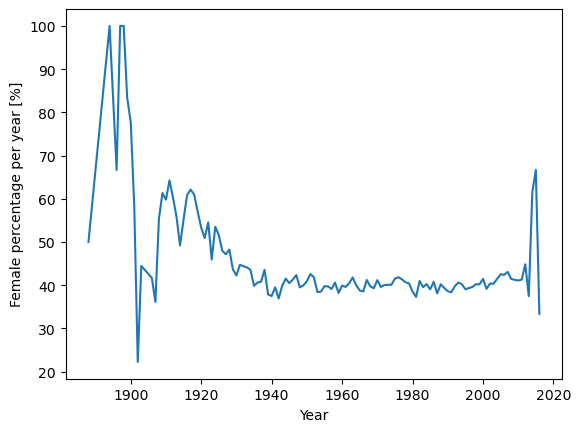

In [31]:
percentage_female_with_year = pd.merge(percentage_female, movie_metadata, on='Wikipedia Movie ID', how='left')
percentage_female_per_year = percentage_female_with_year.groupby('Movie release year')['Percentage Female Characters'].mean()
percentage_female_per_year.columns = ['Movie release year', 'Percentage Female Characters']

plt.plot(percentage_female_per_year.index, percentage_female_per_year)
plt.ylabel('Female percentage per year [%]')
plt.xlabel('Year')

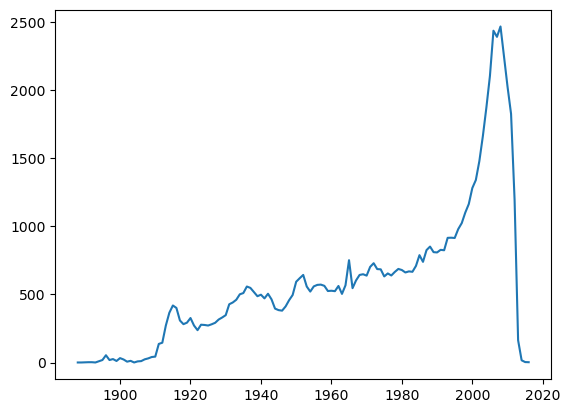

In [40]:
no_movies = movie_metadata.groupby('Movie release year').size()
plt.plot(no_movies)
plt.show()